
![](TigoB2BUVG.png)


# B2B Planes Postpago Móvil y Pago de Diferencias por Equipo: 
# Análisis Exploratorio Aplicado a PYMES


`
> 201556 Wellington Bautista 			
> 201560 Geidy Daniela Perez Estrada		
> 201558 Carlos Mancio 			 
> 201559 Jose Ramiro Martinez 			
`

## Introducción

Tigo, forma parte de Millicom International Cellular S.A. (MIC), con sede central en Luxemburgo. Las operaciones de MIC cuentan con más de 43 millones de clientes en Centroamérica, Suramérica y África, con presencia en 15 países de América Latina y África en los cuales ofrece servicios de telefonía móvil, televisión por cable y satelital, internet y telefonía fija. En Guatemala tiene posiciones de liderazgo en los mercados donde participa.

Dentro de las unidades de negocio o Business Units, la BU de servicios corporativos de Tigo (B2B Tigo Business) brinda servicios en distintos en segmentos de negocios, impulsandolas a renovarse y transformarse, incluso a traves de plataformas digitales.

Por ello, naturalmente se ha enfocado en la atención, atracción y retención de clientes de Empresas Grandes y Multinacionales, que muestran gran dinamismo tanto en términos de facturación (renovaciones y venta de planes) como en demanda de dispositivos de alta gama, **sin embargo la dinámica de mercado actualmente requiere ampliar el espectro de atención a un nuevo segmento: las PYMEs.**

Al contar con conocimiento sólido del negocio, el equipo continuó realizando ejercicios previos para plantear las preguntas claves que se sometieron a un análisis de definición. El presente proyecto intenta responder estas interrogantes por medio del `análisis descriptivo-exploratorio.` y con el propósito de encontrar oportunidades en este momento de disrupción, este proyecto intenta ofrecer un modelo de apoyo a toma de decisiones en el diseño de oferta comercial.

Asimismo, se utilizan gráficas y distintas herramientas para apoyar la interpretación y comparación, para identificar los hallazgos y las nuevas áreas de oportunidad para la empresa y adicionalmente se realizaron campos calculados para apoyar el análisis.





### Definiciones, Variables y Descripción de la base de datos:



- **B2B** Business-to-Business (negocio a negocio). Planes móviles postpago corporativos
- **Diferencia pagada|cobrada** Monto monetario erogado por el cliente en concepto de compra de un dispositivo movil
- **Couta Nueva** Valor monetario mensual pactado para el plan elegido por el cliente
- **Segmento empresarial PYME**: para esta investigación se utilizará el concepto de aprox < 200 empleados.

 



El **dataset utilizado para el análisis está divido en dos partes** y muestra la información del subsidio del segmento PYME de operación de Tigo Business B2B y contiene la siguiente información:



**Variables cualitativas:**

•	Marcas: detalle y todas las demás marcas fueron  agrupadas como “otras”.+

•	División del segment B2B como Large, Multinacional y PYMEs dependiendo de las características cualitativas de los clientes.

•	Los tipos de transacciones, retention y acquisition, que representan suscripciones nuevas y renovaciones de planes.

**Variables cuantitativas:**

•	Monto pagado por el cliente: Diferencia entre el valor de los handset y el subsidio otorgado por la entidad.

•	Cuota: Valor a pagar mensualmente por el cliente, posterior a la renovación.






### Supuestos Generales:
- Enfoque en PYMES 
- Análisis centrado en una de las principales marcas
- Período de tiempo: Primer Bimestre 2019 y Primer Bimestre 2020

### Activación de paquetes adicionales:

- Uso de paleta seaborn
- Uso de paleta de diseño [plt.style.use('seaborn')]


### Consideraciones acerca de los datos
1. Datos de renovaciones/ventas corporativas entre enero-2019 y febrero-2020
3. Se consideran los dispositivos moviles de la MARCA 4
4. Se utilizan categorias arbitrarias / proceso para transformar la data y sea utilizable únicamente para el análisis

In [ ]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import statsmodels.api as sm
import numpy as np
import pandas as pd

plt.style.use('seaborn')



## Primera Parte: 
## Análisis descriptivo del Segmento PYME 2019-2020

A continuación se presenta un análisis del subsididio del segmento comercial PYME, para los meses enero y febrero de los años 2019 y 2020.

In [63]:
df = pd.read_csv("subsidio B2Bpyme.csv")
df.head()

,Subsidy Dt,Año,Mes,CUOTA,NET,NEW_SEGMENT,TIPO_SUBSIDIO,MARCA,MODELO,GAMA,Diferencia_a_pagar,Diferencia_pagada,precio_venta,unidades,Tipo_Bodega,bimestre,marcapref,gruposeleccionado
0,02/05/2020,2020,Feb,275,EQUAL,PYME,RETENTION,MARCA 4,MARCA 4 MODELO F,Utra,12399.0,12399.0,12399,1,TIENDAS,2,1,3
1,01/09/2020,2020,Ene,275,UPGRADE,PYME,RETENTION,MARCA 4,MARCA 4 MODELO G,Utra,8220.0,9919.0,13599,1,TIENDAS,2,1,3
2,02/09/2019,2019,Feb,275,UPGRADE,PYME,RETENTION,MARCA 4,MARCA 4 MODELO O,Utra,9899.0,9899.0,12699,1,TIENDAS,1,1,1
3,1/24/2019,2019,Ene,275,DOWNGRADE,PYME,RETENTION,MARCA 4,MARCA 4 MODELO O,Utra,9899.0,9899.0,12699,1,TIENDAS,1,1,1
4,1/23/2020,2020,Ene,300,DOWNGRADE,PYME,RETENTION,MARCA 4,MARCA 4 MODELO G,Utra,9799.0,9799.0,13599,1,TIENDAS,2,1,3



### Segmento PYME: Participación por marca en el periodo de análisis: Enfoque en la Marca 4


La venta/renovación de dispositivos B2B se concentra principalmente en 4 marcas. Al sumarlas abarcan más del 90% de todas las transacciones en planes corporativos. 
La marca 2 y 3 cuentan con suficiente aceptación en el mercado y es la principal en ventas por lo que en esta ocasión el enfoque central de la investigación se centrará en el comportamiento `**Marca 4**`. Aunque su participación es de menos de 1/5 del mercado, el precio por unidad es muy relevante como se verá a continuación:

In [25]:
marcas = df.groupby(['MARCA'])['unidades'].sum().reset_index()
marcas['Porcentaje'] = 100 * marcas['unidades']  / marcas['unidades'].sum()
print(marcas)


     MARCA  unidades  Porcentaje
0  MARCA 1      1533    9.903101
1  MARCA 2      4158   26.860465
2  MARCA 3      7097   45.846253
3  MARCA 4      2402   15.516796
4    OTRAS       290    1.873385



### Gráfica 1: Distribución de unidades vendidas por marca en todo el período 2019-2020

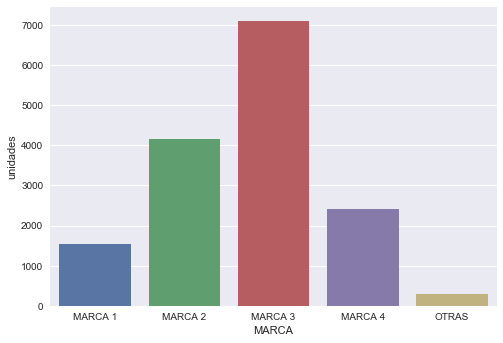

In [26]:
PlotMarcas = sns.barplot(x='MARCA', y='unidades', data=marcas)

### Gráfica 2: Distribución de unidades vendidas por marca y cuota pagada por el cliente

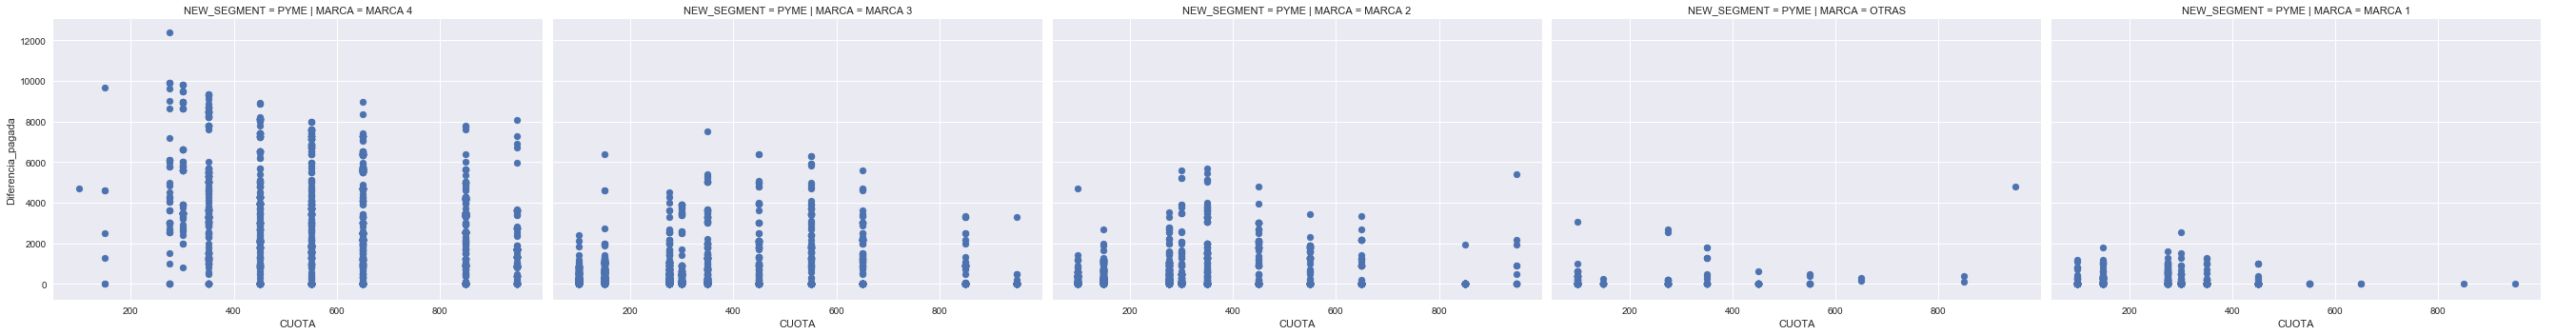

In [27]:
sns.FacetGrid(df, col="MARCA", row="NEW_SEGMENT", height=5, aspect=1.5,)\
.map(plt.scatter, "CUOTA","Diferencia_pagada")\
.add_legend();

> En las gráficas anteriores se observa que la `Marca 4` es una marca "de nicho", ya que considerando todos los períodos, su participación es de **15% de todas las unidades**. Por otra parte, la participación de la `Marca 4` dentro de las ventas se torna relevante de acuerdo a lo que el cliente está efectivamente dispuesto a desembolsar para adquirir el dispositivo.



### Gráfica 3: Distribución de unidades vendidas por marca por 1 bimestre 2019- 1 bimestre 2020

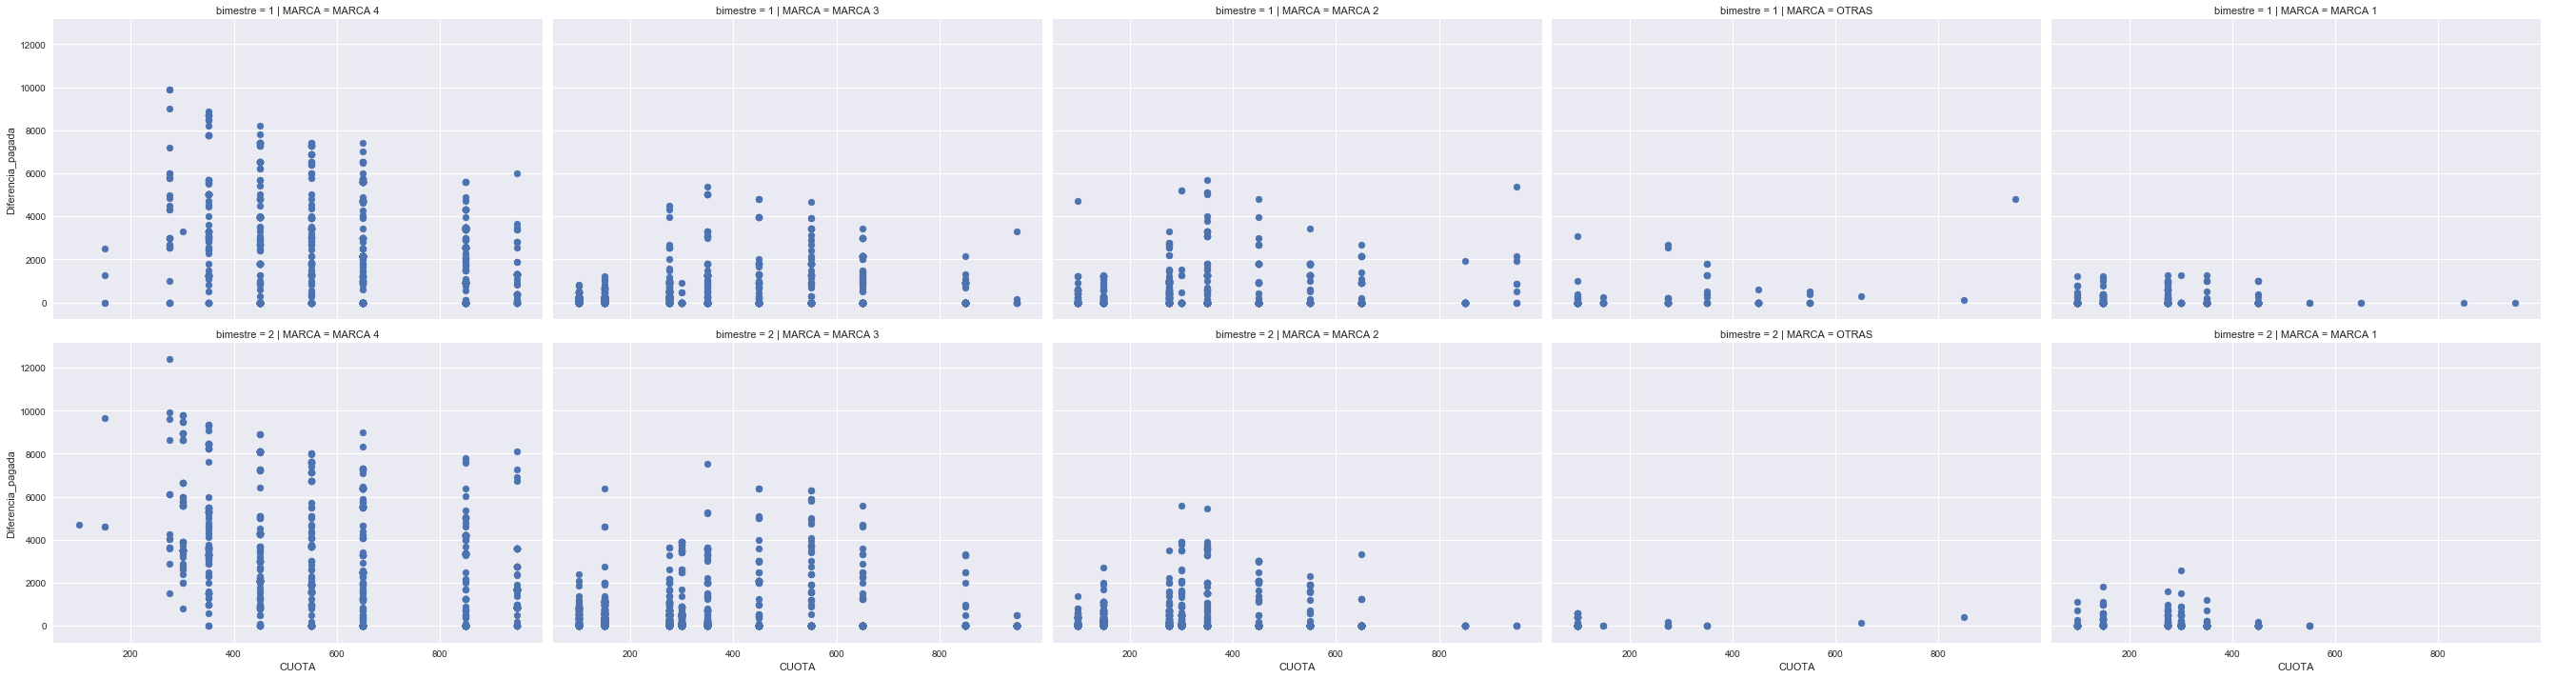

In [39]:
sns.FacetGrid(df, col="MARCA", row="bimestre", height=5, aspect=1.5,)\
.map(plt.scatter, "CUOTA","Diferencia_pagada")\
.add_legend()

In [64]:
##Poblaciones bimestre + Marca 4

dfbim12019_1 = df.where(df['gruposeleccionado'] == 1)
dfbim12019_1.describe()

dfbim12020_2 = df.where(df['gruposeleccionado'] == 3)
dfbim12020_2.describe()

##Poblaciones bimestre todas las marcas

dfbim12019all_1 = df.where(df['bimestre'] == 2019)
dfbim12019all_1.describe()

dfbim12020all_2 = df.where(df['bimestre'] == 2020)
dfbim12020_2.describe()

,Año,CUOTA,Diferencia_a_pagar,Diferencia_pagada,precio_venta,unidades,bimestre,marcapref,gruposeleccionado
count,1242.0,1242.000000,1242.000000,1242.000000,1242.000000,1242.0,1242.0,1242.0,1242.0
mean,2020.0,628.921900,3117.733575,2541.366957,8955.574879,1.0,2.0,1.0,3.0
std,0.0,206.607561,2536.615138,2535.619044,3076.331504,0.0,0.0,0.0,0.0
min,2020.0,99.000000,1.000000,1.000000,4465.000000,1.0,2.0,1.0,3.0
25%,2020.0,450.000000,1250.000000,1.010000,6199.000000,1.0,2.0,1.0,3.0
50%,2020.0,650.000000,2737.000000,1899.500000,7499.000000,1.0,2.0,1.0,3.0
75%,2020.0,850.000000,4300.000000,3899.750000,12399.000000,1.0,2.0,1.0,3.0
max,2020.0,950.000000,12399.000000,12399.000000,13599.000000,1.0,2.0,1.0,3.0


### Gráfica de ventas por marca, mes y tipo de bodega 1er bimestre 2019: Drill Down por mes

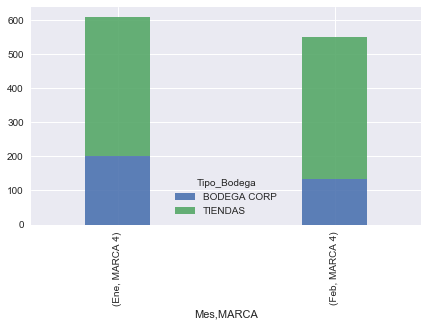

In [66]:
Barras = dfbim12019_1.groupby(["Mes","MARCA","Tipo_Bodega"])["unidades"].sum().unstack()
Barras.plot(kind="bar",stacked=True,alpha = 0.9,width = 0.3,figsize=(7,4));

### Gráfica de ventas por marca, mes y tipo de bodega 1er bimestre 2020: Drill Down por mes

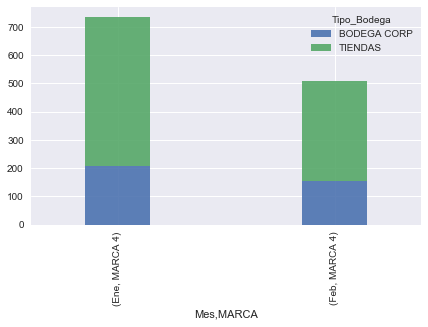

In [69]:
Barras = dfbim12020_2.groupby(["Mes","MARCA","Tipo_Bodega"])["unidades"].sum().unstack()
Barras.plot(kind="bar",stacked=True,alpha = 0.9,width = 0.3,figsize=(7,4));

## Segunda Parte:
## Prueba de Hipótesis: Diferencia en proporciones poblacionales de Unidades Vendidas

### Separación de datasets para análisis de poblaciones diferentes: 1° Bimestre 2019 vs 1° Bimestre 2020

Para realizar el análisis y determinar el comportamiento de la oferta de mercado para clientes de líneas móviles B2B se realiza una segmentación y creación de 2 datasets que contienen el 1° Bimestre 2019 y 1° Bimestre 2020 respectivamente. Se utiliza la variable grupo seleccionado.

### Consideraciones acerca de los datos

- Se supone que los datasets contienen data aleatoria

- Poblaciones suficientemente grandes: > 1000 registros

- Los bimestres se consideran de enero a febrero de cada año analizado

- El análisis se centró en las unidades vendidas de los dispositivos moviles de la `MARCA 4`

- Variable Bimestre: se utilizó **1: para identificar el período Ene-Feb 2019 y el 2: Ene-Feb 2020.**




In [70]:
print(df.groupby(by=['bimestre']).sum().groupby(level=[0]).cumsum())

               Año    CUOTA  Diferencia_a_pagar  Diferencia_pagada  \
bimestre                                                             
1         14250102  2430988          5171262.11       3.512630e+06   
2         16992240  2763301          7784291.52       4.544700e+06   

          precio_venta  unidades  marcapref  gruposeleccionado  
bimestre                                                        
1             23136918      7068       1160              12956  
2             27781854      8412       1242              32406  


**Poblaciones: Separación de Bimestre**

In [71]:
dfbim12019 = df.where(df['bimestre'] == 1)
dfbim12019.describe()

,Año,CUOTA,Diferencia_a_pagar,Diferencia_pagada,precio_venta,unidades,bimestre,marcapref,gruposeleccionado
count,7058.0,7058.00000,7058.000000,7058.000000,7058.000000,7058.000000,7058.0,7058.000000,7058.000000
mean,2019.0,344.43015,732.680945,497.680622,3278.112496,1.001417,1.0,0.164353,1.835647
std,0.0,220.21279,1398.173561,1264.774950,3285.387076,0.071409,0.0,0.370621,0.370621
min,2019.0,99.00000,1.000000,1.000000,125.000000,1.000000,1.0,0.000000,1.000000
25%,2019.0,149.00000,1.000000,1.000000,899.000000,1.000000,1.0,0.000000,2.000000
50%,2019.0,275.00000,1.010000,1.010000,1999.000000,1.000000,1.0,0.000000,2.000000
75%,2019.0,450.00000,1020.000000,180.010000,4999.000000,1.000000,1.0,0.000000,2.000000
max,2019.0,950.00000,9899.000000,9899.000000,12699.000000,6.000000,1.0,1.000000,2.000000


In [56]:
dfbim12020 = df.where(df['bimestre'] == 2)
dfbim12020.describe()


,Año,CUOTA,Diferencia_a_pagar,Diferencia_pagada,precio_venta,unidades,bimestre,marcapref,gruposeleccionado
count,8412.0,8412.000000,8412.000000,8412.000000,8412.000000,8412.0,8412.0,8412.000000,8412.000000
mean,2020.0,328.495126,925.379401,540.263885,3302.645506,1.0,2.0,0.147646,3.852354
std,0.0,206.266481,1510.248708,1399.809611,3278.551326,0.0,0.0,0.354770,0.354770
min,2020.0,99.000000,1.000000,1.000000,149.000000,1.0,2.0,0.000000,3.000000
25%,2020.0,149.000000,1.000000,1.000000,999.000000,1.0,2.0,0.000000,4.000000
50%,2020.0,300.000000,500.000000,1.010000,1999.000000,1.0,2.0,0.000000,4.000000
75%,2020.0,350.000000,1000.000000,212.000000,2999.000000,1.0,2.0,0.000000,4.000000
max,2020.0,950.000000,12399.000000,12399.000000,13599.000000,1.0,2.0,1.000000,4.000000


**Proporciones Poblacionales: Unidades Vendidas**

In [62]:
Prop1 = dfbim12019.groupby(['MARCA'])['unidades'].sum().reset_index()
Prop1['Porcentaje'] = 100 * Prop1['unidades']  / Prop1['unidades'].sum()
print(Prop1)

     MARCA  unidades  Porcentaje
0  MARCA 1    1098.0   15.534805
1  MARCA 2    1783.0   25.226372
2  MARCA 3    2836.0   40.124505
3  MARCA 4    1160.0   16.411998
4    OTRAS     191.0    2.702320


In [63]:
Prop2 = dfbim12020.groupby(['MARCA'])['unidades'].sum().reset_index()
Prop2['Porcentaje'] = 100 * Prop2['unidades']  / Prop2['unidades'].sum()
print(Prop2)

     MARCA  unidades  Porcentaje
0  MARCA 1     435.0    5.171184
1  MARCA 2    2375.0   28.233476
2  MARCA 3    4261.0   50.653828
3  MARCA 4    1242.0   14.764622
4    OTRAS      99.0    1.176890


## Diferencia en proporciones poblacionales: Unidades vendidas


-Para el 1° bimestre de 2019, la proporción de clientes que preferían la Marca 4 fue 1,160

-Para el 1° bimestre de 2020, la proporción de clientes que preferían la Marca 4 fue 1,242

> Pregunta de investigacion: De acuerdo a los datos analizados, ¿existirá una diferencia significativa entre las proporciones de clientes entre el 1° bimestre de 2019 y el 1° bimestre de 2020 que prefieren la `Marca 4`?





### Datos para el análisis y calculo de valor Z y P-Value

**Poblacion**: Todos los clientes que escogieron la Marca 4 para el 1° Bimestre de 2019 y 2020.

**Parametro de interes**: p1 - p2, donde p1 = 1° bimestre de 2019 Marca 4 y p2 = 1° bimestre de 2020 Marca 4  

> **Hipotesis Nula:** p1 - p2 = 0  

> **Hipotesis Alternativa:** p1 - p2 $\neq$ 0 (dos colas)

> Nivel de significancia: 0.05

> Parametro = +/- 1.96

t-stat : estadístico t
pvalue : p-value
df : grados de libertad utilizados en el parámetro t

In [117]:
# Se definen las proporciones:
# p1 = 1° bimestre de 2019 Marca 4 y 
# p2 = 1° bimestre de 2020 Marca 4


n1 = 1160
p1 = .16411998

n2 = 1242
p2 = .14764622

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

sm.stats.ttest_ind(population1, population2)

Zcalculado = print(sm.stats.ttest_ind(population1, population2))
print(Zcalculado)

Zcalculado


(0.7782341568319678, 0.4365076983174673, 2400.0)
None


### Análsis en la Distribución Normal

La distribución normal representa los valores de probabilidad para una variable estándar Z, con media igual a 0 y varianza igual a 1. Es un modelo teórico que intenta aproximar lo más posible el valor de una variable aleatoria continua y se representa de la siguiente manera:

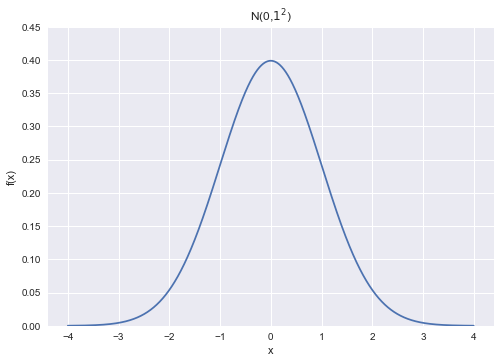

In [67]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)

plt.show()

### Gráfica del Valoz Z

In [ ]:
![](DN.PNG)

![](DN.png)

### Resultado

>Por lo tanto no hay evidencia para rechazar la Ho. 

### Principales Findings

> Con los datos proporcionados, no se cuenta con suficiente información para afirmar que la variación de la proporcion para el 1° Bimestre de 2020 vs el año anterior presenta una variación para considerarla como un cambio, con un nivel de confianza de 95%. Pareciera que las dos proporciones muestran un comportamiento similar en la preferencia de los clientes corporativos con +/- 1.96 de intervalo de confianza.

# Parte Tres

# Modelo y Predicción



## Limpieza de datos
Asginar valores unitarios a las variables de interes asi como excluir aquellos registros sin coherencia para fines del ejercicio (ventas registradas con precios mayores a lo establecido)

In [80]:

da = pd.read_csv("subsidio B2B.csv")
da.head()


da['PAID'] = da['PAID']/da['UNITS']

da.loc[(da['TO_PAY'] > 1) & (da['PAID'] >= 25) & (da['TO_PAY']>=da['PAID']), 'HAS_PAID'] = 'YES'  
da.loc[(da['TO_PAY'] > 1) & (da['PAID'] < 25), 'HAS_PAID'] = 'NO'
da.loc[(da['TO_PAY'] <= 1), 'HAS_PAID'] = 'NO'

da.head()

,DATE,YEAR,MONTH,MBF,NET,SEGMENT,SUBSIDY_TYPE,BRAND,MODEL,RANGE,TO_PAY,PAID,PRICE,UNITS,WAREHOUSE,HAS_PAID
0,8/27/2019,2019.0,Ago,950.0,UPGRADE,CORP,RETENTION,OTRAS,OTRAS MODELO AE,Media,1.0,1899.0,1999.0,50.0,BODEGA CORP,NO
1,10/08/2019,2019.0,Oct,950.0,UPGRADE,CORP,RETENTION,OTRAS,OTRAS MODELO AE,Media,1.0,1899.0,1999.0,40.0,BODEGA CORP,NO
2,11/18/2019,2019.0,Nov,950.0,UPGRADE,CORP,RETENTION,OTRAS,OTRAS MODELO AE,Media,1.0,1899.0,1899.0,30.0,BODEGA CORP,NO
3,1/24/2020,2020.0,Ene,950.0,UPGRADE,MNC,RETENTION,MARCA 1,MARCA 1 MODELO J,Media,36531.0,4059.0,2199.0,9.0,BODEGA CORP,YES
4,11/27/2019,2019.0,Nov,950.0,UPGRADE,MNC,RETENTION,MARCA 1,MARCA 1 MODELO J,Media,33588.0,2799.0,2799.0,12.0,BODEGA CORP,YES


## Variables a utlizar
**Variable Dependiente**
- PAID, es el valor pagado por un equipo Handset en concepto de renovación o venta de un plan corporativo

**Variables Independientes**
- MBF: Cuota del plan en el que se adquiere el equipo movil
- WAREHOUSE: Bodega de donse sale el equipo, Tienda/Corporativo

**Otras**
- SEGMENT, segmento comercial al que pertenece el cliente que realiza la transacción de compra o renovación
- SUBSIDY_TYPE, Tipo de transacción en la que se adquiere el equipo movil

### Filtrado de valores
Al evaluar la "normalidad" de la variable de interes se llego a determinar que la data se ajusta mas a una distribución gausiana cuando:
- Existe un pago realizado
- Se circunscribe el alcance a un modelo de dispositivo movil en especifico

In [81]:
with_pay = da[da['HAS_PAID'] == 'YES']
with_pay = with_pay[with_pay["MODEL"]=="MARCA 4 MODELO N"]
cols = ["PAID", "MBF", "WAREHOUSE","SEGMENT","SUBSIDY_TYPE"]
with_pay = with_pay[cols].dropna()
with_pay.sort_values("PAID", ascending = True).head()

,PAID,MBF,WAREHOUSE,SEGMENT,SUBSIDY_TYPE
23963,100.0,950.0,TIENDAS,MNC,RETENTION
23648,100.0,950.0,TIENDAS,PYME,RETENTION
23649,100.0,950.0,TIENDAS,PYME,RETENTION
23651,100.0,850.0,TIENDAS,PYME,RETENTION
23653,100.0,650.0,TIENDAS,PYME,RETENTION


### Evluando la distribución de los datos

In [82]:
with_pay.describe()['PAID']

count     598.000000
mean     3463.107157
std      2132.434228
min       100.000000
25%      2000.000000
50%      3000.000000
75%      4719.000000
max      8999.000000
Name: PAID, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5462979C8>]],
      dtype=object)

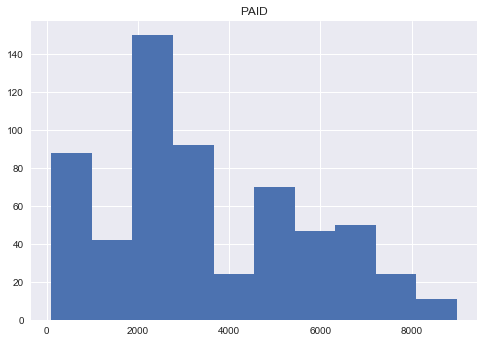

In [83]:
with_pay.hist(column='PAID')

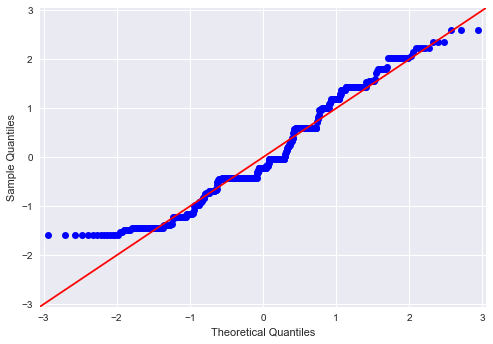

In [84]:
fig = sm.qqplot(with_pay['PAID'], fit=True, line='45');
plt.show()

### Pruebas complementarias sobre la distribución de los datos

**Normalización de los datos**

### Visualización de las variables

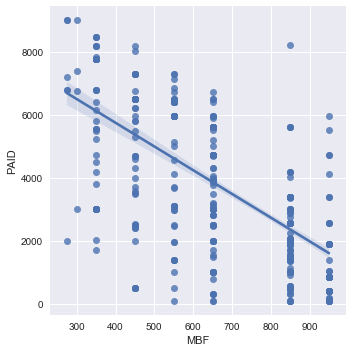

In [85]:
_ = sns.lmplot(x='MBF',y='PAID',data=with_pay,fit_reg=True)

## Modelo (1)
Graficamente se demuestra que exite una relación entre el plan adquirido y el valor a pagar por el Modelo N de la Marca 4. Los datos de las siguientes tablas concluyen en que por cada quetzal adicional en la cuota del plan en la que se adquiere el movil, incide en una disminución de Q7.5 en el valor del equipo. <br> Expresado en otros terminos, el valor a pagar por un equipo esta determinado en un 47% por el valor del plan en el que este se adquiere.

In [86]:
with_pay[["PAID", "MBF"]].corr()

,PAID,MBF
PAID,1.000000,-0.686843
MBF,-0.686843,1.000000


In [87]:
model = sm.OLS.from_formula("PAID ~ MBF ", data=with_pay)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PAID   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     532.3
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.21e-84
Time:                        20:29:57   Log-Likelihood:                -5240.9
No. Observations:                 598   AIC:                         1.049e+04
Df Residuals:                     596   BIC:                         1.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8760.6091    238.220     36.775      0.000    8292.757    9228.461
MBF           -7.5238      0.326    -23.071      0.000      -8.164      -6.883
==============================================================================
Omnibus:                       38.828   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.755
Skew:                          -0.579   Prob(JB):                     4.27e-11
Kurtosis:                       3.758   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
new_MBF = 750
avg_paid = 8760.6091 -7.5238*new_MBF
print("El valor esperado  de pago promedio para Modelo N en una cuota de 750  es de: ")
print(avg_paid)

El valor esperado  de pago promedio para Modelo N en una cuota de 750  es de: 
3117.7591


### Predicción (1)
Considerando como unica variable para el ejercicio el MBF en el que se aquiere el equipo, realizamos un modelo linea y = b + ax, donde se estable que el valor maximo a pagar por un equipo (MBF=0) es de Q8,760. <br> Entonces para un plan nuevo de Q750 se esperaria que el pago a recibir por un Modelo N de la Marca 4 sea de Q3,117.76

## Modelo (2)
Inclusión de variables categoricas, de antemano es sabido que en las transacciones que se realizan en tiendas son mas propensas a cobrar mayor cantidad de Q en concepto de equipo.

**Exploración de variables categoricas**

In [89]:
with_pay['WAREHOUSE'].unique()

array(['TIENDAS', 'BODEGA CORP'], dtype=object)

In [90]:
with_pay['SUBSIDY_TYPE'].unique()

array(['RETENTION', 'ACQUISITION'], dtype=object)

In [91]:
with_pay['SEGMENT'].unique()

array(['PYME', 'CORP', 'MNC'], dtype=object)

In [92]:
statistics_TIENDAS = with_pay[with_pay['WAREHOUSE'] == 'TIENDAS'].describe()
statistics_TIENDAS.rename(columns=lambda x: x + '_tiendas', inplace=True)

statistics_CORP = with_pay[with_pay['WAREHOUSE'] == 'BODEGA CORP'].describe()
statistics_CORP.rename(columns=lambda x: x + '_corp', inplace=True)

statistics = pd.concat([statistics_TIENDAS, statistics_CORP], axis=1)
statistics

,PAID_tiendas,MBF_tiendas,PAID_corp,MBF_corp
count,330.000000,330.000000,268.000000,268.000000
mean,3713.830485,733.939394,3154.380672,667.350746
std,2208.645494,184.824149,1995.815527,200.461257
min,100.000000,275.000000,200.000000,275.000000
25%,2559.000000,650.000000,1537.500000,550.000000
50%,3399.000000,850.000000,3000.000000,650.000000
75%,5619.000000,850.000000,4365.000000,850.000000
max,8999.000000,950.000000,8219.000000,950.000000


### Visualización de datos
Graficamente se logra identificar que la asociación ya desmostrada entre lo pagado por equipo y la cuota del plan, se ve influenciada por la bodega de la que sale el movil, siendo mayor la diferencia pagada en tiendas vs bodega corporativa, incluso se logra identififcar una mayor participación de tiendas en la venta de equipos Modelo N de la Marca 4

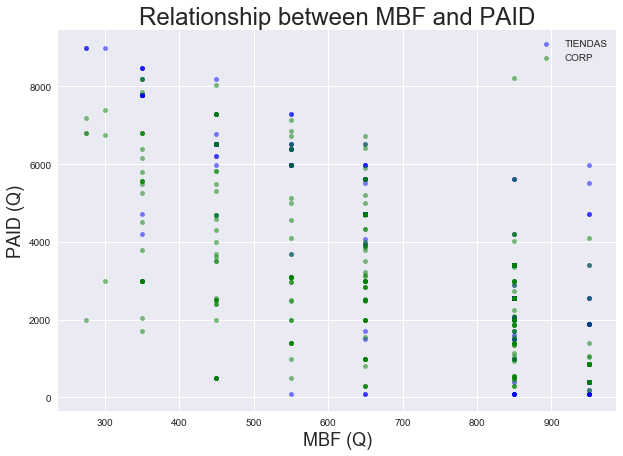

In [93]:
ax1 = with_pay[with_pay['WAREHOUSE'] == 'TIENDAS'].plot(kind='scatter', x='MBF', y='PAID', color='blue', alpha=0.5, figsize=(10, 7))
with_pay[with_pay['WAREHOUSE'] == 'BODEGA CORP'].plot(kind='scatter', x='MBF', y='PAID', color='green', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['TIENDAS', 'CORP'])
plt.title('Relationship between MBF and PAID', size=24)
plt.xlabel('MBF (Q)', size=18)
plt.ylabel('PAID (Q)', size=18);

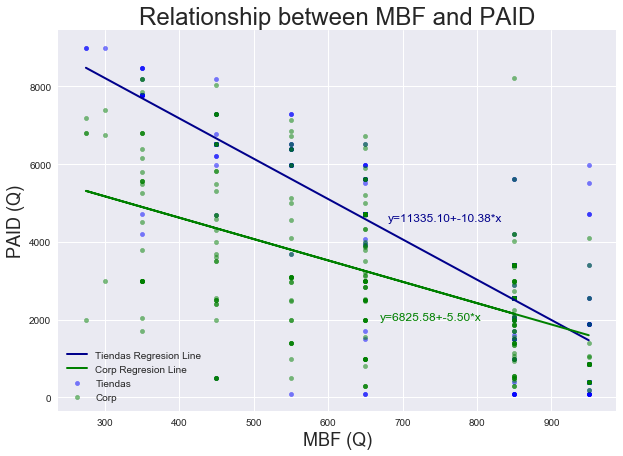

In [94]:
# best fit polynomials
df_tiendas = with_pay[with_pay['WAREHOUSE'] == 'TIENDAS']
df_corp = with_pay[with_pay['WAREHOUSE'] == 'BODEGA CORP']

# polynomial - tiendas
tiendas_fit = np.polyfit(df_tiendas.MBF, df_tiendas.PAID, 1)

# polynomial - corp
corp_fit = np.polyfit(df_corp.MBF, df_corp.PAID, 1)

# Scatter plots.
ax1 = df_tiendas.plot(kind='scatter', x='MBF', y='PAID', color='blue', alpha=0.5, figsize=(10, 7))
df_corp.plot(kind='scatter', x='MBF', y='PAID', color='green', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_tiendas.MBF, tiendas_fit[0] * df_tiendas.MBF + tiendas_fit[1], color='darkblue', linewidth=2)
plt.plot(df_corp.MBF, corp_fit[0] * df_corp.MBF + corp_fit[1], color='green', linewidth=2)

# regression equations
plt.text(680, 4530, 'y={:.2f}+{:.2f}*x'.format(tiendas_fit[1], tiendas_fit[0]), color='darkblue', size=12)
plt.text(670, 2000, 'y={:.2f}+{:.2f}*x'.format(corp_fit[1], corp_fit[0]), color='green', size=12)

# legend, title and labels.
plt.legend(labels=['Tiendas Regresion Line', 'Corp Regresion Line', 'Tiendas', 'Corp'])
plt.title('Relationship between MBF and PAID', size=24)
plt.xlabel('MBF (Q)', size=18)
plt.ylabel('PAID (Q)', size=18);

### Predicción (2)
Considerando un modelo lineal para cada grupo (Tiendas/Bodega Corp) se estable el modelo presentado en la grafica presedente y con la que llegamos a conclusión que de adquirirse un Modelo N de la Marca 4 en un nuevo plan con valor de Q750, en tiendas se esperara cobrar Q3,547 y en la bodega Corp Q2,699.

In [95]:
Plan = 750
pred_tiendas = tiendas_fit[1] + Plan * tiendas_fit[0]
pred_corp = corp_fit[1] + Plan * corp_fit[0]
print("Para un nuevo plan de Q%4d, en tiendas se espera cobrar Q %6.2f y en la bodega corporativa  Q %6.2f" % (Plan, pred_tiendas, pred_corp))


Para un nuevo plan de Q 750, en tiendas se espera cobrar Q 3547.06 y en la bodega corporativa  Q 2699.71


## Visualización de la Predicción

In [96]:
from statsmodels.sandbox.predict_functional import predict_functional
model = sm.OLS.from_formula("PAID ~ MBF + WAREHOUSE", data=with_pay)
result = model.fit()

**Renovación en tiendas para pymes del Modelo N de la Marca 4**

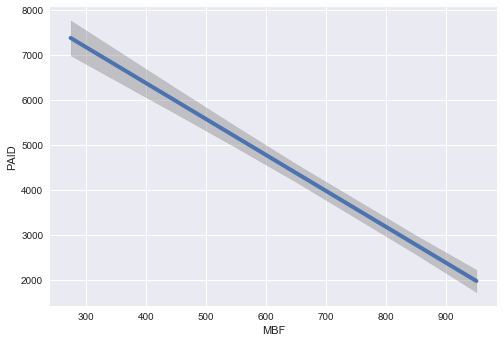

In [97]:
values = {"SUBSIDY_TYPE":"RETENTION", "WAREHOUSE": "TIENDAS", "SEGMENT":"PYME"}
pr, cb, fv = predict_functional(result, "MBF",
                values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("MBF")
_ = ax.set_ylabel("PAID")

**Renovación en Bodega Corp para pymes del Modelo N de la Marca 4**

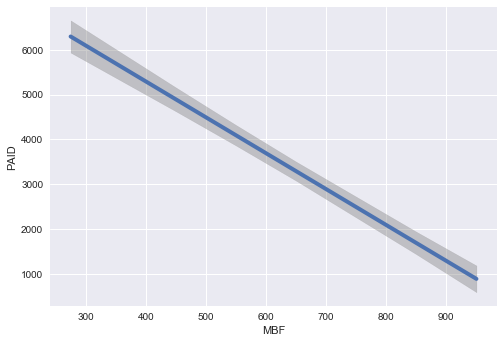

In [98]:
values = {"SUBSIDY_TYPE":"RETENTION", "WAREHOUSE": "BODEGA CORP", "SEGMENT":"PYME"}
pr, cb, fv = predict_functional(result, "MBF",
                values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("MBF")
_ = ax.set_ylabel("PAID")

# Recomendaciones y Principales Insights:

> De acuerdo a los datos analizados, el comportamiento de preferencia de Marca 4 es muy similar en los 2 bimestres analizados. Los modelos de Predicción 1 y Predicción 2 se complementan. El análisis realizado sugiere que el nuevo plan de Q750 podría impulsarse más en el canal de ventas de agencias ya que hay una oportunidad de negocio importante y se podría obtener revenue adicional de +6% vs manternerlo todo igual, por cada unidad vendida en ese canal.
